In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

## define A, b
システムA, bを決定する

In [2]:
m = 5
n = 10

In [3]:
A = np.random.randint(low=0, high=4, size=(m, n))
b = np.random.randint(low=1, high=11, size=(m, ))

A, b

(array([[0, 2, 2, 0, 3, 0, 2, 3, 2, 2],
        [0, 1, 0, 1, 0, 2, 0, 1, 2, 3],
        [0, 3, 2, 0, 3, 2, 3, 1, 2, 2],
        [2, 0, 0, 0, 0, 2, 3, 2, 0, 3],
        [3, 1, 2, 3, 0, 2, 3, 1, 2, 0]]),
 array([10,  8,  9,  6, 10]))

## define b

In [4]:
w_init = np.random.random(size=(n, ))
w_init

array([0.83006919, 0.72771561, 0.66203473, 0.72772007, 0.25086388,
       0.22020295, 0.09553021, 0.4714671 , 0.43065693, 0.35574238])

In [5]:
def SteepestDescent(A, b, w, lam, iter=101): 
    # Hesse行列、最大固有値の計算
    Hesse = A.T@A + lam * np.identity(n)
    u, v = LA.eig(Hesse)
    L = abs(u).max()
    print(L)

    f_step = np.zeros(iter)
    Aw_step = np.zeros(iter)
    
    for k in range(iter):
        # df/dw
        f = LA.norm((b - A@w), ord=2) + lam * LA.norm(w, ord=2)
        Aw = LA.norm((b - A@w), ord=2)
        f_step[k] = f
        Aw_step[k] = Aw
        dfdw = A.T@A@w - A.T@b + lam*w
        w = w - (1/L) * dfdw
        
    return f_step, Aw_step

## lambda = 0

119.4355085859621


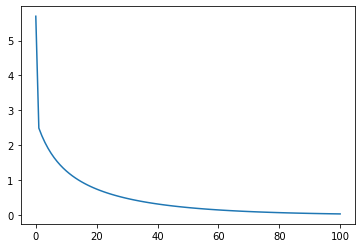

In [6]:
lam = 0
w = np.copy(w_init)
fstep_lam0, Aw_step0 = SteepestDescent(A, b, w, lam)
plt.plot(fstep_lam0)

120.43550858596217


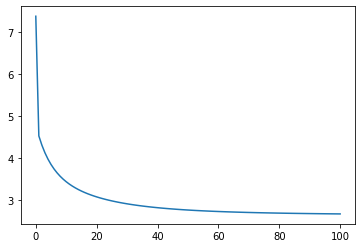

In [7]:
lam = 1
w = np.copy(w_init)
fstep_lam1, Aw_step1 = SteepestDescent(A, b, w, lam)
plt.plot(fstep_lam1)

124.43550858596208


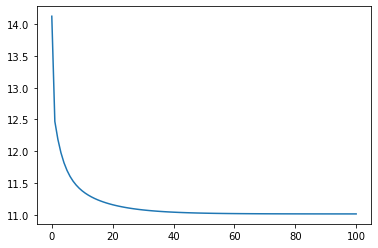

In [8]:
lam = 5
w = np.copy(w_init)
fstep_lam5, Aw_step5 = SteepestDescent(A, b, w, lam)
plt.plot(fstep_lam5)

129.43550858596214


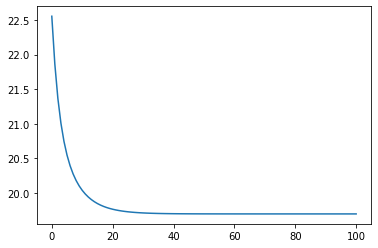

In [9]:
lam = 10
w = np.copy(w_init)
fstep_lam10, Aw_step10 = SteepestDescent(A, b, w, lam)
plt.plot(fstep_lam10)

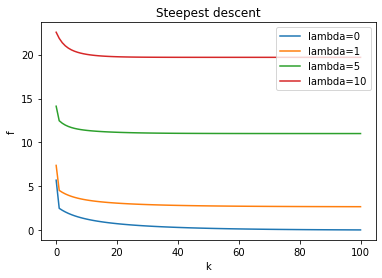

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel('k')
ax.set_ylabel('f')
ax.set_title(r'Steepest descent')

ax.plot(fstep_lam0, label='lambda=0')
ax.plot(fstep_lam1, label='lambda=1')
ax.plot(fstep_lam5, label='lambda=5')
ax.plot(fstep_lam10, label='lambda=10')
ax.legend()
plt.savefig('SG_f.png')
plt.show()

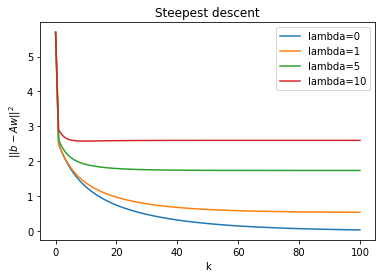

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel('k')
ax.set_ylabel('$||b-Aw||^2$')
ax.set_title(r'Steepest descent')

ax.plot(Aw_step0, label='lambda=0')
ax.plot(Aw_step1, label='lambda=1')
ax.plot(Aw_step5, label='lambda=5')
ax.plot(Aw_step10, label='lambda=10')
ax.legend()
plt.savefig('SG_Aw.png')
plt.show()